## Pablo Valdunciel Sánchez 
## 5th October 2019

Compare the different linkage methods that can be used with the AgglomerativeClustering algoritm:
- Single link
- Complete link 
- Avarage
- Ward 

Use the *iris* dataset that vary the number of clusters between 3 and 10

## Imports

In [47]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score 

from scipy.stats import mode

## Data preparation

In [48]:
iris_dataset = load_iris()
X = iris_dataset["data"]
Y = iris_dataset["target"]
X = MinMaxScaler().fit_transform(X)
print(X.shape,Y.shape)

(150, 4) (150,)


## Auxiliar functions

In [49]:
def get_indexes(target, myList):
    """Returns the indexes where the list 'myList' 
       contains the specified element 'target'"""
    for i in range(len(myList)):
        if myList[i] == target:
            yield i

### Training and test

In [55]:
MIN_CLUSTERS = 3 
MAX_CLUSTERS = 10 
NUM_CLUSTERS = MAX_CLUSTERS - MIN_CLUSTERS +1
linkage_methods = ['single', 'complete', 'average', 'ward']

hit_rates = {}

for method in linkage_methods:
    
    method_hit_rates = [0] * NUM_CLUSTERS
        
    for k in range(MIN_CLUSTERS, MAX_CLUSTERS+1):   

        clustering = AgglomerativeClustering(n_clusters=k, linkage=method)
        prediction = clustering.fit_predict(X)
        mode_values = [None] * k

        for i in range(0, k):
            cluster_indexes = list(get_indexes(i, prediction))
            cluster_values = Y[cluster_indexes]
            mode_values[i] = mode(cluster_values)[0]

        t_prediction = np.fromiter(map(lambda x: mode_values[x], prediction), dtype=np.int)
        method_hit_rates[k-MIN_CLUSTERS] = accuracy_score(t_prediction, Y)  
    
    hit_rates[method] = method_hit_rates


## Comparison

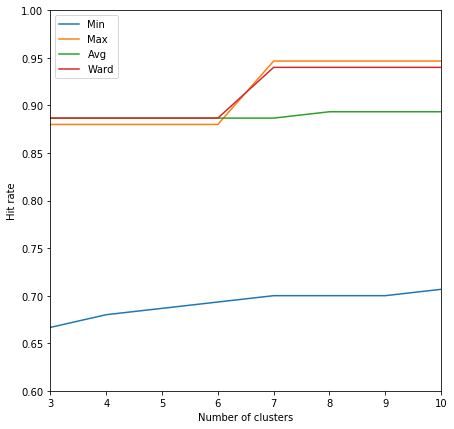

In [56]:
fig = plt.figure(figsize=(7, 7))
x = range(MIN_CLUSTERS, MAX_CLUSTERS+1)
plt.plot(x, hit_rates["single"])
plt.plot(x, hit_rates["complete"])
plt.plot(x, hit_rates["average"])
plt.plot(x, hit_rates["ward"])
plt.legend(['Min','Max', 'Avg','Ward'])
plt.axis([3,10,0.6,1.0])
plt.ylabel('Hit rate')
plt.xlabel('Number of clusters')
plt.show()